<a href="https://colab.research.google.com/github/Subhajit53/Teleom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

#<b>Introduction
#####"We see our customers as invited guests to a party, and we are the hosts. It's our job everyday to make every important aspect of the customer experience a little better."
##### The above quote, given by Jeff Bezos, founder and CEO of Amazon, tells a lot about customer retention in this competitive world. If you don't serve your customers well, there are many hungry companies to take away that bite from your mouth.
##### That's why, customer retention has been one of the chief goals of any customer serving company. Unsatisfied customers not only make loss to the business, but also creates a negative impression in the market.
##### And in this telecom dependent era, there are a lot of emerging companies to give a tough competition to any other existing telecom industry whether it is in pricing, data speed, call connectivity, international charges and all.
##### There might be several factors affecting customer churn for a specific company. Naturally, Orange S.A. also wants to find out what reasons are causing its customers to leave their services. And by finding that out, it can take precautious measures to retain its customers.

#<b> The Talking Data </b>
##### Understanding the data is the first step towards any analysis. Without having an idea of what we have in our plates, we can't proceed a step. The data in question here have 20 columns and 3333 rows. Although no data dictionary was provided with the dataset, let's try to figure out what features our dataset have.
1. <b> State: </b> State in which the customer lives in.
2. <b> Account length: </b> For how many days the customer is using the service.
3. <b> Area code: </b> An identifier to the area the customer lives in.
4. <b> International plan: </b> A binary identifier to whether the customer has opted for an international plan.
5. <b> Voice mail plan: </b> A binary identifier to whether the customer has opted for a voice mail plan.
6. <b> Number vmail messages: </b> Number of voicemail messages sent or received.
7. <b> Total day minutes: </b> How much the customer has talked over phone in the daytime.
8. <b> Total day calls: </b> How many calls the customer has made over phone in the daytime.
9. <b> Total day charge: </b> How much money was charged to the customer in the daytime.
10. <b> Total eve minutes: </b> How much the customer has talked over phone in the evening.
11. <b> Total eve calls: </b> How many calls the customer has made over phone in the evening.
12. <b> Total eve charge: </b> How much money was charged to the customer in the evening.
13. <b> Total night minutes: </b> How much the customer has talked over phone in the night.
14. <b> Total night calls: </b> How many calls the customer has made over phone in the night
15. <b> Total night charge: </b> How much money was charged to the customer in the night.
16. <b> Total intl minutes: </b> How much the customer has talked over phone internationally.
17. <b> Total intl calls: </b> How many calls the customer has made over phone internationally.
18. <b> Total intl charge: </b> How much money was charged to the customer for international calls.
19. <b> Customer service calls: </b> How many service calls were made to the customer.
20. <b> Churn: </b> A binary identifier to whether the customer has churned or not.

# <b> Approach </b>
Before proceeding to the main analysis part, let us discuss how we are going to approach the given problem.

#### <b> 1. Data Cleaning: </b>
##### The first and most crucial task for analysing a data is to clean it first. A messy data can give messy outputs. As we are not currently feeding the data to any ML model, we shall only check on null values and unrealistic values. We shall make a conclusion about outliers while doing the analysis.
#### <b> 2. Univariate Analysis: </b>
##### We shall make some plots and try to conclude about each possible variable individually.
#### <b> 3. Bivariate Analysis: </b>
##### We shall make some plots and try to conclude about pairs of variables. We can also assess relations between the Churn variable and other variables.
#### <b> 4. Multivariate Analysis: </b>
##### We shall make a correlation heatmap and try to make conclusions about magnitude of relationship between Churn and other variables.

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <b> Reading the dataset and exploring it

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the dataset
telecom_df = pd.read_csv('/content/drive/MyDrive/Telecom Churn Analysis - Subhajit Ganguly/Telecom Churn.csv')

In [5]:
# Let's see how the data looks like
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
telecom_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
# Checking the shape of the data
telecom_df.shape

(3333, 20)

In [8]:
# Checking for overall info and null values
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [9]:
# Getting an idea of numerical features
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
# Checking for duplicate observations
telecom_df.duplicated().value_counts()

False    3333
dtype: int64

### <b>1. Data Cleaning: </b>
##### While exploring the data, we saw that our dataframe has 3333 observations and all the columns have 3333 non-null values. Hence we are free of any headache to deal with the demonic nulls!
##### Now again, with the describe() method, we saw that the numerical columns have no unrealistic values!
##### It seems that the data is a very good boy and showed some mercy to us by lessening our work! Now it's time to bind the data in chairs and beat it until it spits out some information to us.
##### Sorry data! Being a good boy doesn't always help!

### <b>2. Univariate Analysis: </b>
##### Now it's time to take our first step towards understanding the data. Let's see what it had been hiding from us! We shall form each chunk with these parts : Question, Analysis, Conclusion.


#### <b> Question:
##### <b> How are the customers distributed throughout states?

#### <b> Analysis:

Text(0, 0.5, 'Number of Customers')

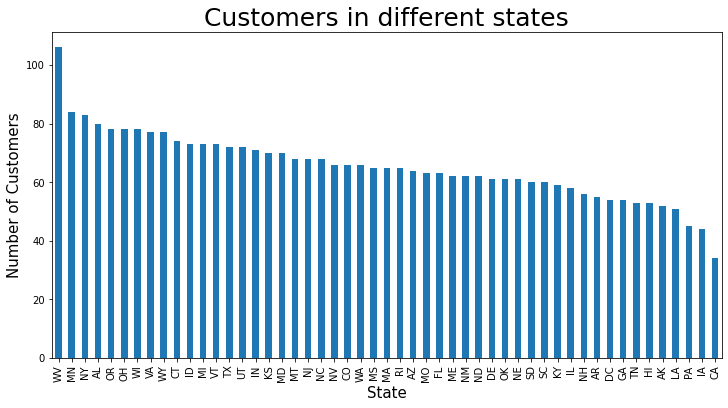

In [15]:
# Plotting a bar chart for 'States' column
plt.rcParams['figure.figsize'] = (12,6)
telecom_df['State'].value_counts().plot(kind = 'bar')
plt.title('Customers in different states', size = 25)
plt.xlabel('State', size = 15)
plt.ylabel('Number of Customers', size = 15)

#### <b> Conclusion: </b>
1. WV has highest number of customers and CA has lowest number of customers.
2. Except for WV, PA, IA, CA, the other states don't deviate so much in case of having customers.

#### <b> Question:
##### <b> How Account Length of customers is distributed?

#### <b> Analysis:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Account Length')

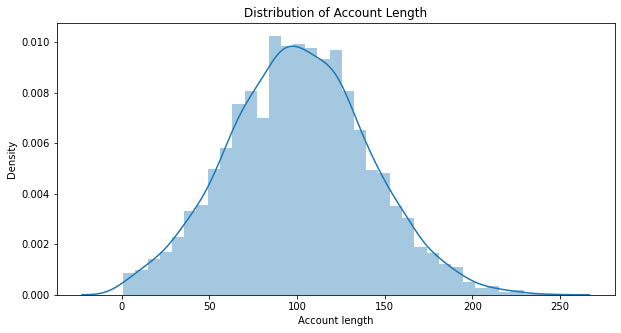

In [16]:
# Plotting a distribution chart for 'Account length' column
plt.rcParams['figure.figsize'] = (10,5)
sns.distplot(telecom_df['Account length'], hist = True)
plt.title('Distribution of Account Length')

#### <b> Conclusion: </b>
1. Account length of customers have an almost Normal Distribution.
2. People with very old or very new accounts are very few in numbers

#### <b> Question:
##### <b> How the customer distribution is in different areas?

#### <b> Analysis:

Text(0, 0.5, 'Number of Customers')

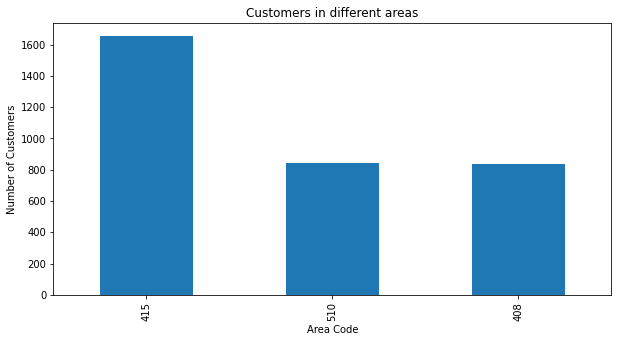

In [17]:
# Plotting a bar chart for 'Area code' column
plt.rcParams['figure.figsize'] = (10,5)
telecom_df['Area code'].value_counts().plot(kind = 'bar')
plt.title('Customers in different areas')
plt.xlabel('Area Code')
plt.ylabel('Number of Customers')

#### <b> Conclusion: </b>
1. The area with code 415 has most number of customers.
2. The areas with codes 408 and 510 have almost half number of customers than the area 415.

#### <b> Question:
##### <b> How the customers are opting for international plan and voice plan?

#### <b> Analysis:

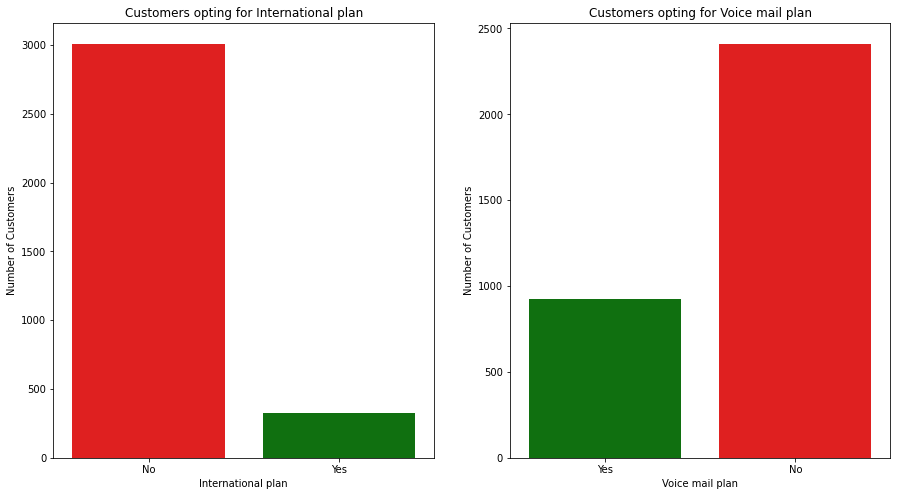

In [18]:
# Plotting a bar charts for 'International plan' and 'Voice mail plan' column
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.countplot(data = telecom_df, x = 'International plan', palette=['r', 'g'])
plt.title('Customers opting for International plan')
plt.ylabel('Number of Customers')

plt.subplot(1,2,2)
sns.countplot(data = telecom_df, x = 'Voice mail plan', palette=['g', 'r'])
plt.title('Customers opting for Voice mail plan')
plt.ylabel('Number of Customers')

plt.show()

#### <b> Conclusion: </b>
1. More people didn't choose to recharge with International or Voice mail plans.
2. But in case of Voice mail plan, the ratio between Yes and No is a bit higher.

#### <b> Question:
##### <b> How many calls are being made during different times of a day?

#### <b> Analysis:

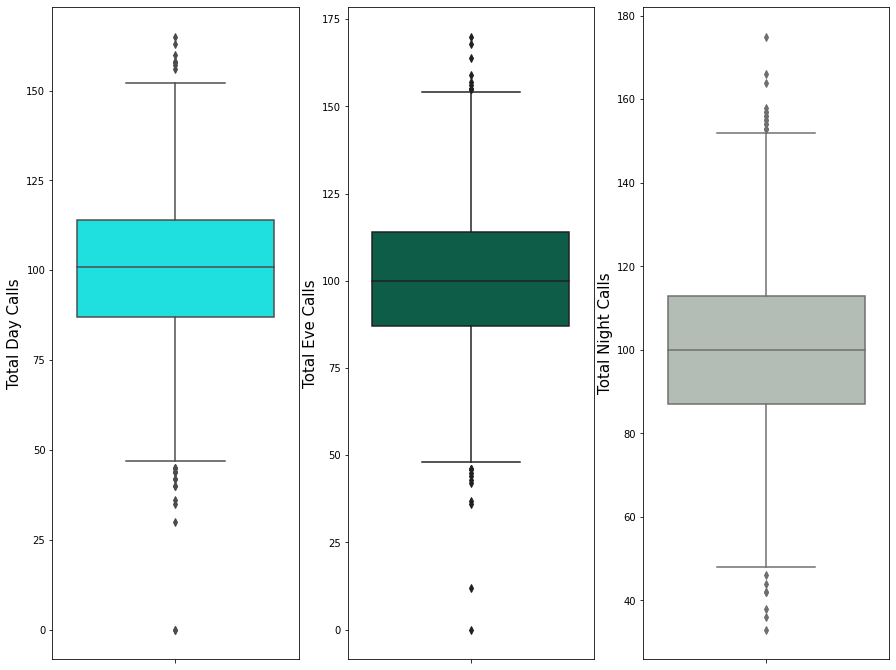

In [24]:
# Plotting a boxplots for 'Total day Calls', 'Total eve Calls' and 'Total night Calls' column
plt.figure(figsize = (15,12))
plt.subplot(1,3,1)
sns.boxplot(data = telecom_df, y = 'Total day calls', color = '#00FFFF')
plt.ylabel('Total Day Calls', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = telecom_df, y = 'Total eve calls', color = '#006A4E')
plt.ylabel('Total Eve Calls', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data = telecom_df, y = 'Total night calls', color = '#B2BEB5')
plt.ylabel('Total Night Calls', fontsize = 15)

plt.show()

#### <b> Conclusion: </b>
1. Most calls were made during daytime and least calls were made in the night.
2. There are few too small outlier points in Total Day Calls and Total Eve Calls and a large outlier point in Total Night Calls which need to be treated before feeding the data into an ML algorithm.

#### <b> Question:
##### <b> How much customers are talking during different times of a day?

#### <b> Analysis:

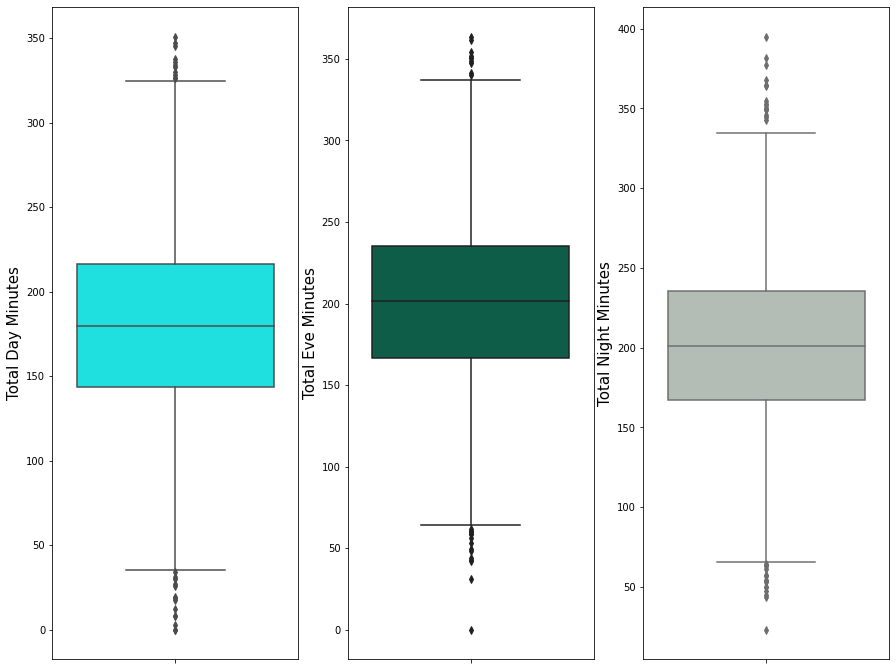

In [25]:
# Plotting a boxplots for 'Total day Minutes', 'Total eve Minutes' and 'Total night Minutes' column
plt.figure(figsize = (15,12))
plt.subplot(1,3,1)
sns.boxplot(data = telecom_df, y = 'Total day minutes', color = '#00FFFF')
plt.ylabel('Total Day Minutes', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = telecom_df, y = 'Total eve minutes', color = '#006A4E')
plt.ylabel('Total Eve Minutes', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data = telecom_df, y = 'Total night minutes', color = '#B2BEB5')
plt.ylabel('Total Night Minutes', fontsize = 15)

plt.show()

#### <b> Conclusion: </b>
1. Customers talked more during evening and less during night.
2. Despite the fact that most calls were made during the daytime, customers did not spend much time talking over phone.
3. Some outlier treatment is necessary for the extreme points in Total Eve Minutes and Total Night Minutes.

#### <b> Question:
##### <b> How much customers are paying during different times of a day?

#### <b> Analysis:

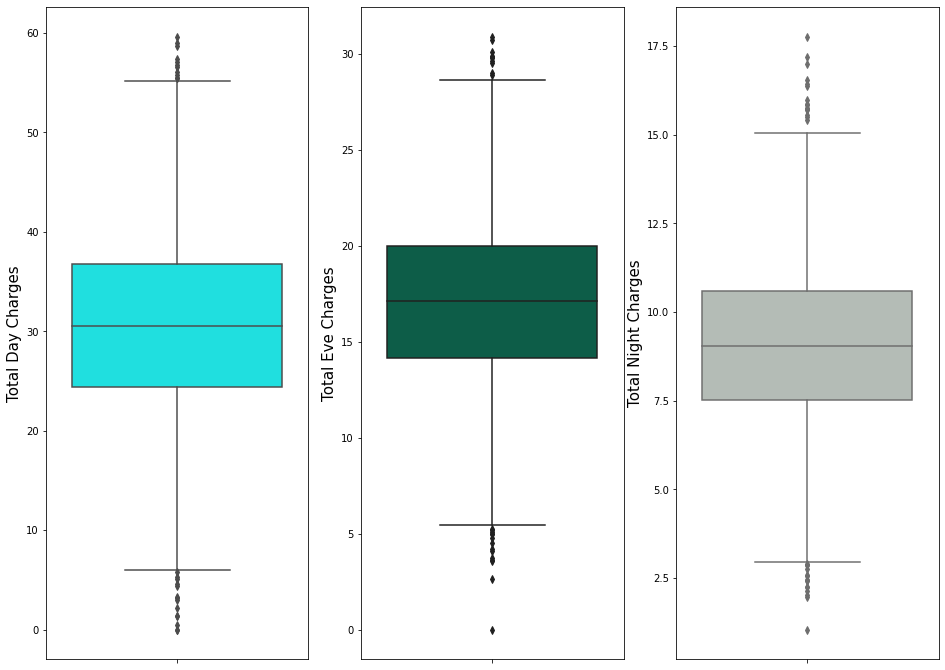

In [28]:
# Plotting a boxplots for 'Total day charge', 'Total eve charge' and 'Total night charge' column
plt.figure(figsize = (16,12))
plt.subplot(1,3,1)
sns.boxplot(data = telecom_df, y = 'Total day charge', color = '#00FFFF')
plt.ylabel('Total Day Charges', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = telecom_df, y = 'Total eve charge', color = '#006A4E')
plt.ylabel('Total Eve Charges', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data = telecom_df, y = 'Total night charge', color = '#B2BEB5')
plt.ylabel('Total Night Charges', fontsize = 15)

plt.show()

#### <b> Conclusion: </b>
1. The charges are maximum in the evening time and lowest in the night time.
2. These plots are in conjunction with the minutes spoken.

#### <b> Question:
##### <b> What can we say about the customers opting for International plan?

#### <b> Analysis:

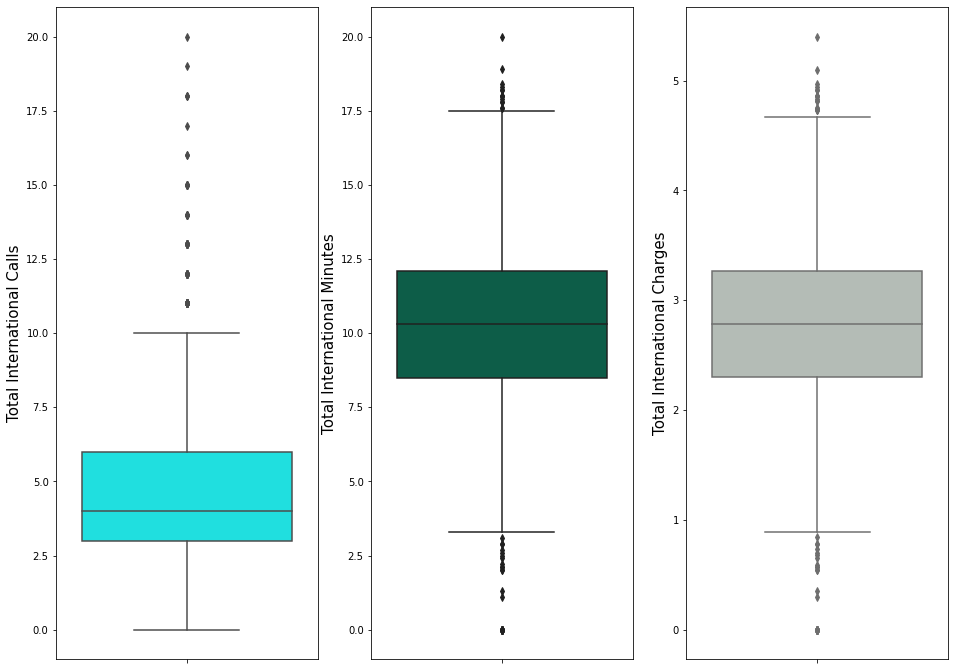

In [30]:
# Plotting a boxplots for 'Total intl calls', 'Total intl minutes' and 'Total intl charge' column
plt.figure(figsize = (16,12))
plt.subplot(1,3,1)
sns.boxplot(data = telecom_df, y = 'Total intl calls', color = '#00FFFF')
plt.ylabel('Total International Calls', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = telecom_df, y = 'Total intl minutes', color = '#006A4E')
plt.ylabel('Total International Minutes', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data = telecom_df, y = 'Total intl charge', color = '#B2BEB5')
plt.ylabel('Total International Charges', fontsize = 15)

plt.show()

#### <b> Conclusion: </b>
1. Number of average International calls made is too low.
2. Range of all three metrics are much lesser than domestic day, eve and night calls.

#### <b> Question:
##### <b> What can we say about customer service calls made?

#### <b> Analysis:

Text(0.5, 1.0, 'No. of service calls made by customers')

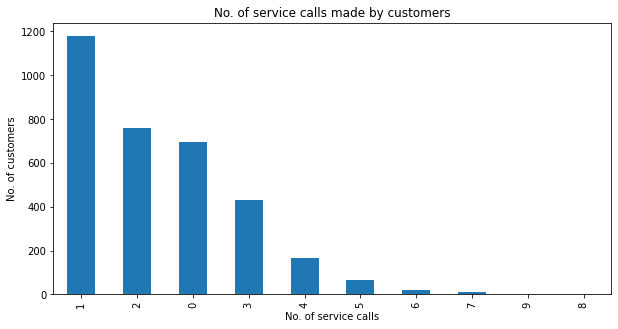

In [31]:
# Plotting a bar chart for 'Customer service calls' column
plt.figure(figsize = (10,5))
telecom_df['Customer service calls'].value_counts().plot(kind='bar')
plt.xlabel('No. of service calls')
plt.ylabel('No. of customers')
plt.title('No. of service calls made by customers')

#### <b> Conclusion: </b>
1. Probability of making more than 5 service calls is minuscule.

#### <b> Question:
##### <b> What about the main hero, Churn?

#### <b> Analysis:

Text(0.5, 1.0, 'Churn vs Not Churn')

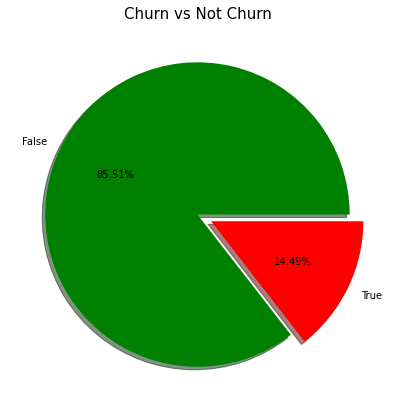

In [32]:
# Plotting a pie chart for 'Churn' column
plt.figure(figsize = (10,7))
plt.pie(telecom_df.Churn.value_counts(), labels = ['False', 'True'], explode = [0,0.1], autopct='%1.2f%%', colors = ['g', 'r'], shadow = True)
plt.title('Churn vs Not Churn', fontsize = 15)

#### <b> Conclusion: </b>
1. Almost 14.49% of total customers have left the service.

### <b>3. Bivariate Analysis: </b>
##### Now as we know about those individual columns, let's try to find out some interrelationships between them especially with Churn.

#### <b> Question:
##### <b> Which state has most churns?

#### <b> Analysis:

Text(0, 0.5, 'Number of Churns')

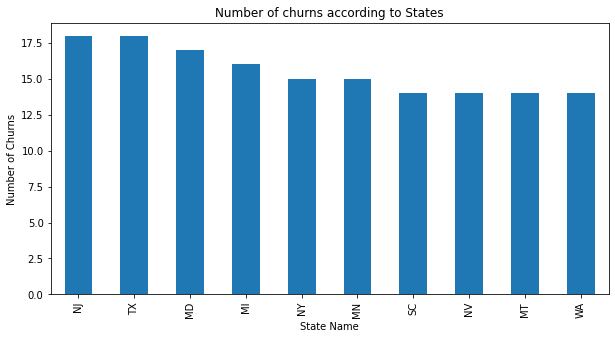

In [33]:
# Plotting churns as per state
telecom_df[telecom_df['Churn'] == True]['State'].value_counts().head(10).plot(kind = 'bar')
plt.title('Number of churns according to States')
plt.xlabel('State Name')
plt.ylabel('Number of Churns')

In [34]:
# Making a dataframe to store churn_rate
state_churn = telecom_df[telecom_df['Churn'] == True]['State'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [35]:
state_customer_count = telecom_df['State'].value_counts().rename_axis('unique_values').reset_index(name='total')

In [36]:
state_churn = pd.merge(state_churn, state_customer_count, on = 'unique_values', how = 'left')

In [37]:
# Calculating churn rates
state_churn['churn_rate'] = state_churn['counts']/state_churn['total']*100

Text(0, 0.5, 'Churn Rate')

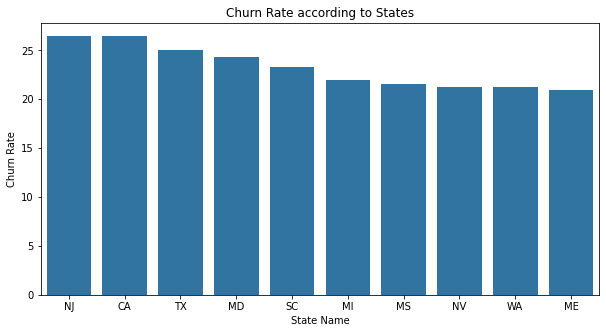

In [38]:
# Plotting churn rate as per state's total customers
state_churn = state_churn.sort_values('churn_rate', ascending = False)[:10]
sns.barplot(y = state_churn['churn_rate'], x = state_churn['unique_values'], palette = ['#1f77b4'])
plt.title('Churn Rate according to States')
plt.xlabel('State Name')
plt.ylabel('Churn Rate')

#### <b> Conclusion: </b>
1. NJ has highest number of churns as well as highest churn rate.
2. Although CA doesn't have many customer churns or customers, but it has high churn rate.
3. Though NY and MN have high customer churns, they don't have high churn rate.

#### <b> Question:
##### <b> Which area has most churns?

#### <b> Analysis:

Text(0, 0.5, 'Number of Churns')

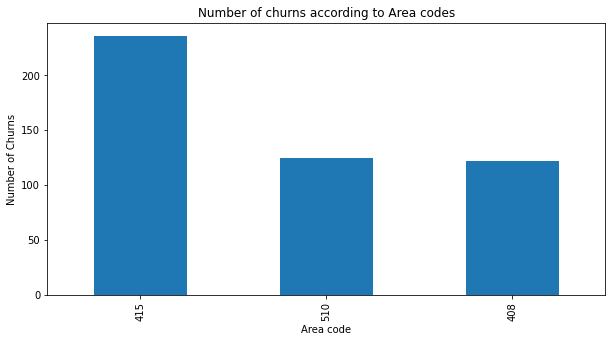

In [39]:
# Plotting churns as per area code
telecom_df[telecom_df['Churn'] == True]['Area code'].value_counts().plot(kind = 'bar')
plt.title('Number of churns according to Area codes')
plt.xlabel('Area code')
plt.ylabel('Number of Churns')

In [40]:
# Making a dataframe to store churn_rate
area_churn = telecom_df[telecom_df['Churn'] == True]['Area code'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [41]:
area_customer_count = telecom_df['Area code'].value_counts().rename_axis('unique_values').reset_index(name='total')

In [42]:
area_churn = pd.merge(area_churn, area_customer_count, on = 'unique_values', how = 'left')

In [43]:
# Calculating churn rates
area_churn['churn_rate'] = area_churn['counts']/area_churn['total']*100

Text(0, 0.5, 'Churn Rate')

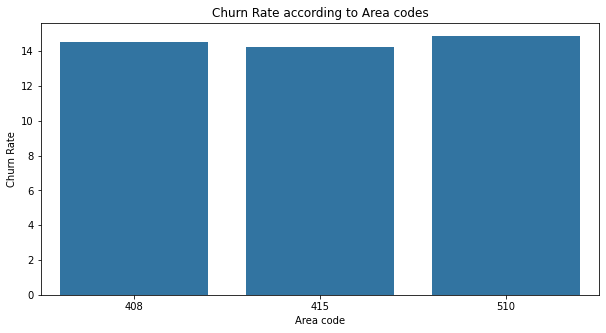

In [44]:
# Plotting churn rate as per area's total customers
area_churn = area_churn.sort_values('churn_rate', ascending = False)
sns.barplot(y = area_churn['churn_rate'], x = area_churn['unique_values'], palette = ['#1f77b4'])
plt.title('Churn Rate according to Area codes')
plt.xlabel('Area code')
plt.ylabel('Churn Rate')

#### <b> Conclusion: </b>
1. Area 415 has highest number of churns.
2. But the churn rates for all 3 areas are almost similar. Which means customers are likely to churn in any area.

#### <b> Question:
##### <b> Are my new customers churning more or older ones?

#### <b> Analysis:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


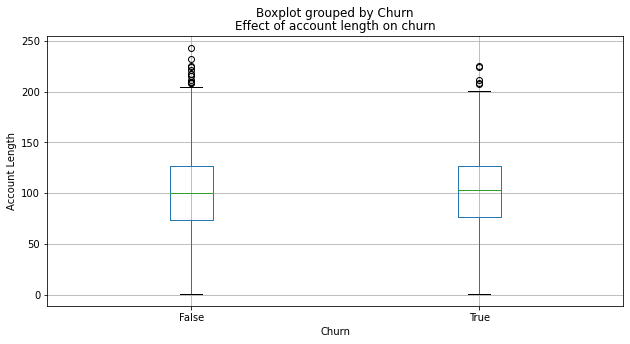

In [45]:
# Plotting box plots to assess distribution of account lengths by churn
telecom_df.boxplot(column = 'Account length', by = 'Churn')
plt.ylabel("Account Length")
plt.title('Effect of account length on churn')
plt.show()

#### <b> Conclusion: </b>
1. It is clear from the above graph that customers have similar probability to churn irrespective of the length they are using the service.

#### <b> Question:
##### <b> What is the relationship between Churn and opting for Voice mail plan?

#### <b> Analysis:

Text(0, 0.5, 'Count')

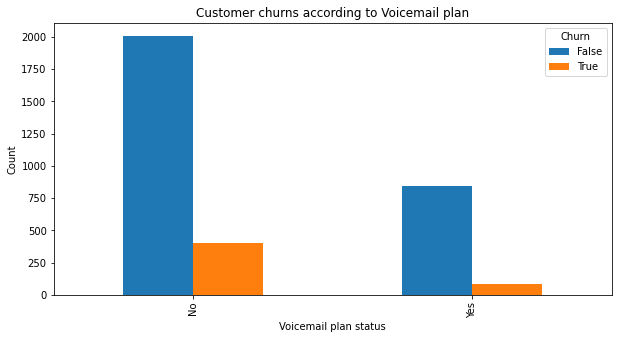

In [46]:
# Plotting multiple bar plot to assess effect of voice mail plans on churn
telecom_df.groupby('Voice mail plan')['Churn'].value_counts().unstack().plot(kind='bar')
plt.title('Customer churns according to Voicemail plan')
plt.xlabel('Voicemail plan status')
plt.ylabel('Count')

#### <b> Conclusion: </b>
1. Customers with or without voicemail plan are equally likely to churn.

#### <b> Question:
##### <b> What is the relationship between Churn and opting for international plan?

#### <b> Analysis:

Text(0, 0.5, 'Count')

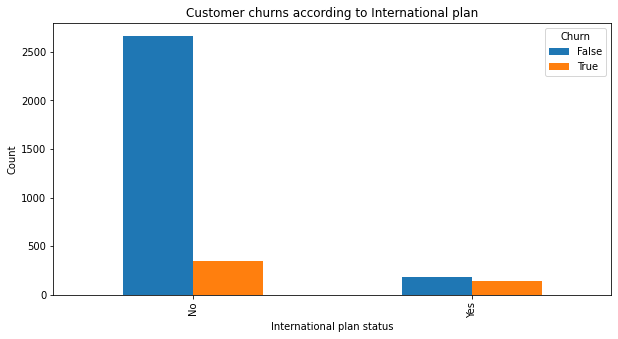

In [47]:
# Plotting multiple bar plot to assess effect of international plans on churn
telecom_df.groupby('International plan')['Churn'].value_counts().unstack().plot(kind='bar')
plt.title('Customer churns according to International plan')
plt.xlabel('International plan status')
plt.ylabel('Count')

#### <b> Conclusion: </b>
1. Although customers with international plans are lesser in number, they are more likely to churn.

#### <b> Question:
##### <b> What is the effect of daytime metrics on churn?

#### <b> Analysis:

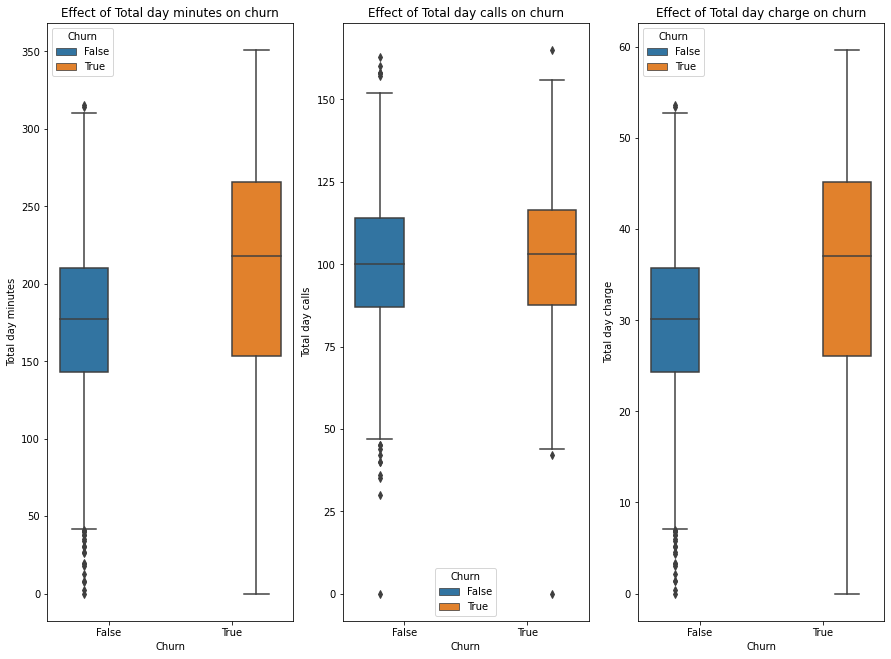

In [51]:
# Plotting box plots to assess effect of daytime metrics on churn
plt.figure(figsize = (15,11))

plt.subplot(1,3,1)
sns.boxplot(data = telecom_df, x = 'Churn', y = 'Total day minutes', hue = 'Churn')
plt.ylabel("Total day minutes")
plt.title('Effect of Total day minutes on churn')

plt.subplot(1,3,2)
sns.boxplot(data = telecom_df, x = 'Churn', y = 'Total day calls', hue = 'Churn')
plt.ylabel("Total day calls")
plt.title('Effect of Total day calls on churn')

plt.subplot(1,3,3)
sns.boxplot(data = telecom_df, x = 'Churn', y = 'Total day charge', hue = 'Churn')
plt.ylabel("Total day charge")
plt.title('Effect of Total day charge on churn')

plt.show()

#### <b> Conclusion: </b>
1. People who are talking more during daytime and are being charged more, are churning more.

#### <b> Question:
##### <b> What is the effect of eve metrics on churn?

#### <b> Analysis:

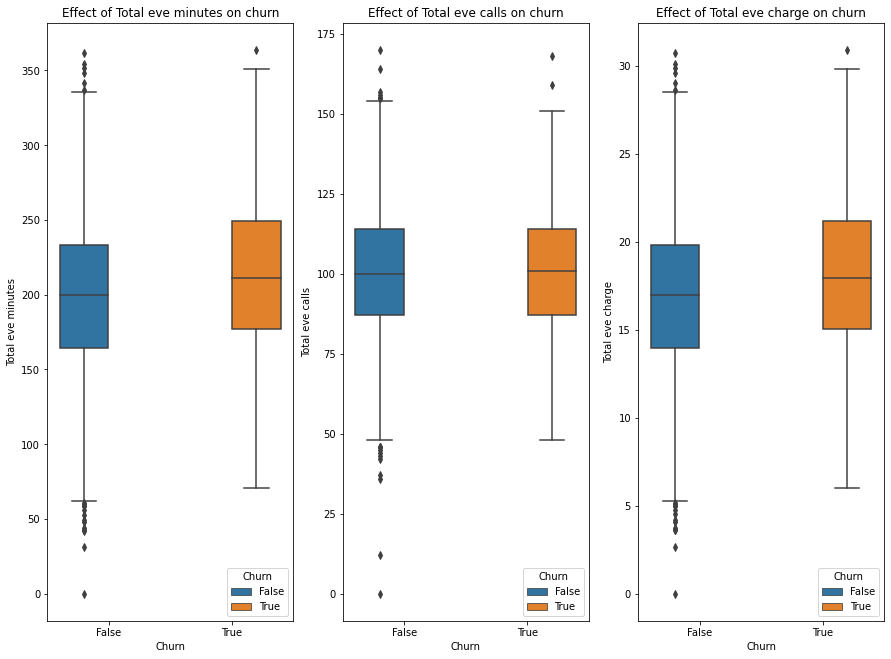

In [52]:
# Plotting box plots to assess effect of evening metrics on churn
plt.figure(figsize = (15,11))

plt.subplot(1,3,1)
sns.boxplot(data = telecom_df, x = 'Churn', y = 'Total eve minutes', hue = 'Churn')
plt.ylabel("Total eve minutes")
plt.title('Effect of Total eve minutes on churn')

plt.subplot(1,3,2)
sns.boxplot(data = telecom_df, x = 'Churn', y = 'Total eve calls', hue = 'Churn')
plt.ylabel("Total eve calls")
plt.title('Effect of Total eve calls on churn')

plt.subplot(1,3,3)
sns.boxplot(data = telecom_df, x = 'Churn', y = 'Total eve charge', hue = 'Churn')
plt.ylabel("Total eve charge")
plt.title('Effect of Total eve charge on churn')

plt.show()

#### <b> Conclusion: </b>
1. People who are talking more during evening and are being charged more, are churning more.

#### <b> Question:
##### <b> What is the effect of night metrics on churn?

#### <b> Analysis:

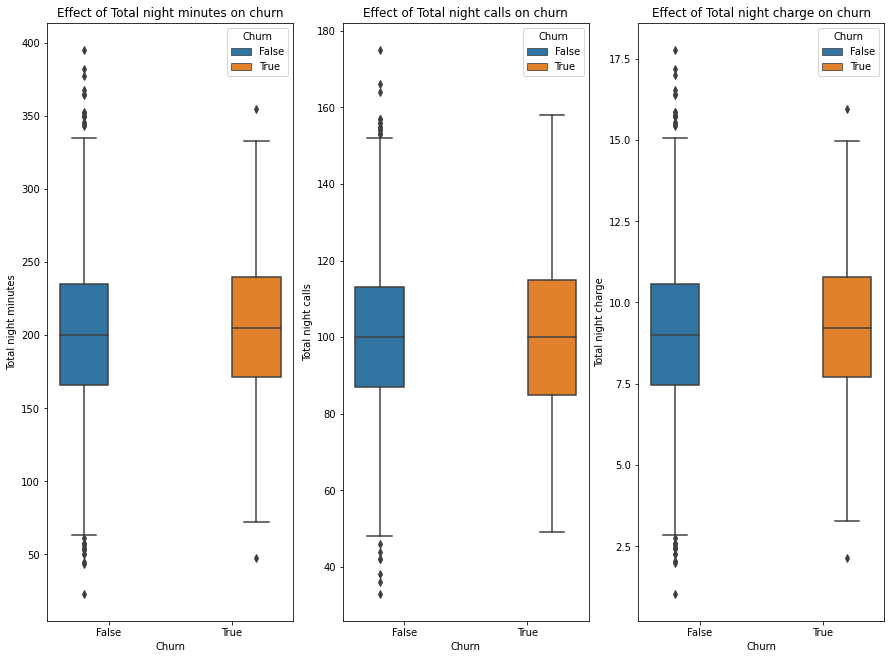

In [53]:
# Plotting box plots to assess effect of night time metrics on churn
plt.figure(figsize = (15,11))

plt.subplot(1,3,1)
sns.boxplot(data = telecom_df, x = 'Churn', y = 'Total night minutes', hue = 'Churn')
plt.ylabel("Total night minutes")
plt.title('Effect of Total night minutes on churn')

plt.subplot(1,3,2)
sns.boxplot(data = telecom_df, x = 'Churn', y = 'Total night calls', hue = 'Churn')
plt.ylabel("Total night calls")
plt.title('Effect of Total night calls on churn')

plt.subplot(1,3,3)
sns.boxplot(data = telecom_df, x = 'Churn', y = 'Total night charge', hue = 'Churn')
plt.ylabel("Total night charge")
plt.title('Effect of Total night charge on churn')

plt.show()

#### <b> Conclusion: </b>
1. There is almost no effect of night metrics over churn.

#### <b> Question:
##### <b> What is the effect of international metrics on churn?

#### <b> Analysis:

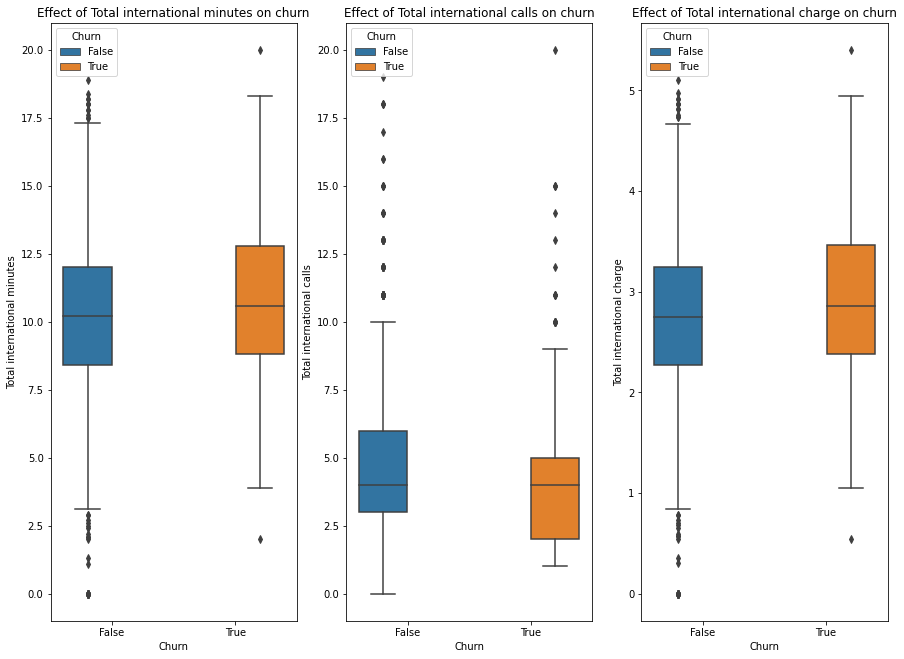

In [54]:
# Plotting box plots to assess effect of international metrics on churn
plt.figure(figsize = (15,11))

plt.subplot(1,3,1)
sns.boxplot(data = telecom_df, x = 'Churn', y = 'Total intl minutes', hue = 'Churn')
plt.ylabel("Total international minutes")
plt.title('Effect of Total international minutes on churn')

plt.subplot(1,3,2)
sns.boxplot(data = telecom_df, x = 'Churn', y = 'Total intl calls', hue = 'Churn')
plt.ylabel("Total international calls")
plt.title('Effect of Total international calls on churn')

plt.subplot(1,3,3)
sns.boxplot(data = telecom_df, x = 'Churn', y = 'Total intl charge', hue = 'Churn')
plt.ylabel("Total international charge")
plt.title('Effect of Total international charge on churn')

plt.show()

#### <b> Conclusion: </b>
1. People who are talking more internationally and are being charged more, have slightly higher chance of churning.

#### <b> Question:
##### <b> What is the relationship between number of service calls and churn?

#### <b> Analysis:

Text(0.5, 0, 'Number of service calls')

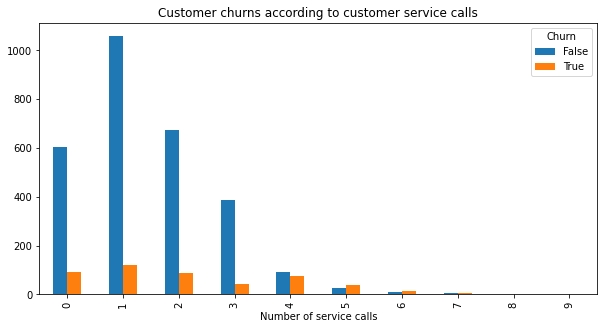

In [55]:
# Plotting multiple bar plots to assess effect of service calls on churn
telecom_df.groupby('Customer service calls')['Churn'].value_counts().unstack().plot(kind='bar')
plt.title('Customer churns according to customer service calls')
plt.xlabel('Number of service calls')

#### <b> Conclusion: </b>
1. If more than 3 service calls are made, customers are more likely to churn.

### <b>4. Multivariate Analysis: </b>
##### In this chunk, we are going to discuss about relationships between multiple variables or features.

Let's start by having a correlation heatmap first.

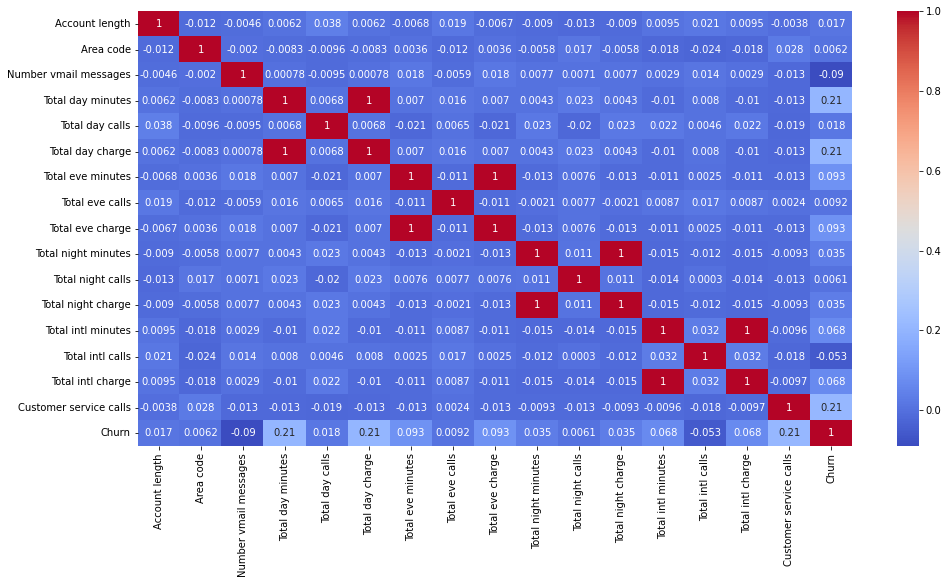

In [56]:
# Plotting correlation heatmap
plt.figure(figsize = (16,8))
corrmat = telecom_df.corr()
sns.heatmap(corrmat, annot = True, cmap = 'coolwarm')

We can see that there is a perfect positive correlation between talking minutes and charges for day, eve, night and international calls. It means that prices charged for talking is perfectly balanced throughout any time of the day or international calls.

* <b> Note : </b>
##### If we want to fit a logistic regression model to the data, we have to take care of this high correlations or multicollinearity.

##### Some other notable relations are:
* Total day minutes to Churn at 0.21
* Total day charge to Churn at 0.21
* Customer service calls to Churn at 0.21

Now let's analyse how day charges and customer service calls affect the churns.

<Figure size 864x432 with 0 Axes>

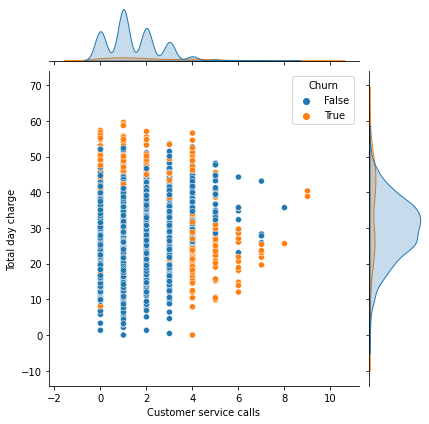

In [57]:
# Plotting pair plot between 'Total day charge' and 'Customer service calls' with 'Churn' as hue
plt.figure(figsize=(12,6))
sns.jointplot(data = telecom_df, x = 'Customer service calls', y = 'Total day charge', hue = 'Churn')
plt.xlabel('Customer service calls', fontsize = 12)
plt.ylabel('Total day charges', fontsize = 12)
plt.show()

#### <b> Conclusion: </b>
1. If service calls are made more than 8 times, customers are bound to churn.
2. If service calls are made less than 5 times and customers are being charged more, they have high probability of churning.

Analysis of the total day charge to the minutes spoken over churn rate could give us a better understanding of the same.

<Figure size 1080x432 with 0 Axes>

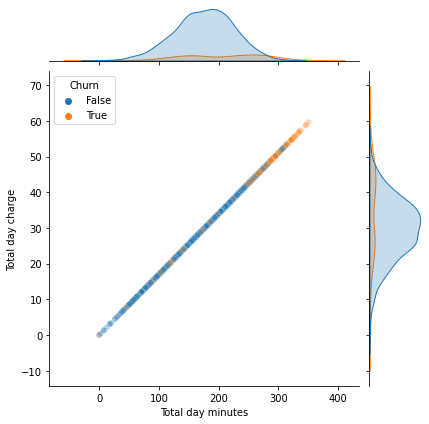

In [58]:
# Plotting pair plot between 'Total day charge' and 'Total day charge' with 'Churn' as hue
plt.figure(figsize = (15,6))
sns.jointplot(data = telecom_df, x = 'Total day minutes', y = 'Total day charge',
                hue = 'Churn', alpha = 0.3)
plt.xlabel('Total Day Minutes', fontsize = 13)
plt.ylabel('Total Day Charges', fontsize = 13)
plt.show()


#### <b> Conclusion: </b>
1. A perfectly linear relationship can be observed between the two Variables.
2. Visible Churn can be seen with higher charges imposed when spoken for longer times.

Let's see what can we conclude about eve and night time calls.

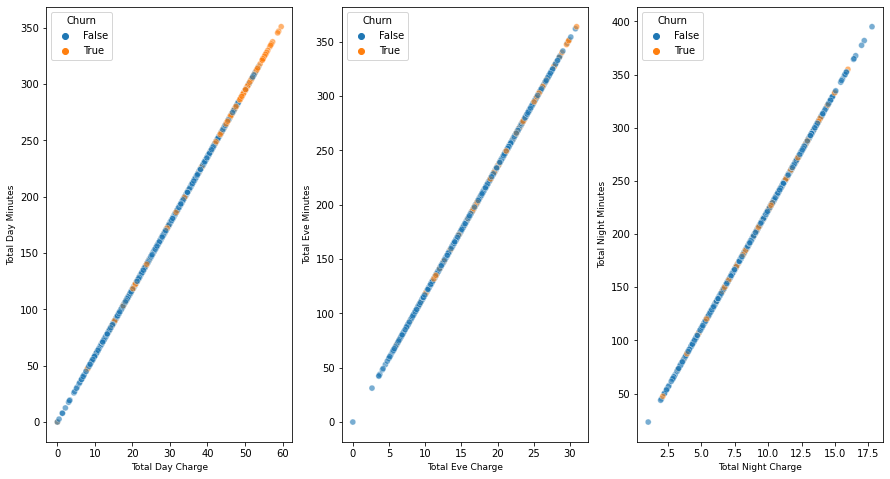

In [59]:
# Plotting pair plots between charges and minutes for different times of day with 'Churn' as hue
plt.figure(figsize = (15,8))
plt.subplot(1,3,1)
sns.scatterplot(data = telecom_df, x = 'Total day charge', y = 'Total day minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Day Charge', fontsize = 9)
plt.ylabel('Total Day Minutes', fontsize = 9)

plt.subplot(1,3,2)
sns.scatterplot(data = telecom_df, x = 'Total eve charge', y = 'Total eve minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Eve Charge', fontsize = 9)
plt.ylabel('Total Eve Minutes', fontsize = 9)

plt.subplot(1,3,3)
sns.scatterplot(data = telecom_df, x = 'Total night charge', y = 'Total night minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Night Charge', fontsize = 9)
plt.ylabel('Total Night Minutes', fontsize = 9)

plt.show()

#### <b> Conclusion: </b>
1. We can observe from the three scatterplots that total minutes talked and charges have most impact on the churn rate during the Day.
2.In the evening and night we can see that the churn rate is not so relevant.

# <b> Final Verdicts : </b>
### <b> Important Features: </b>
1. Based on my observation I can see that most people who leave the service are the ones who use the service in the day mostly.
2. It can also be observed that most people who use the service in the morning, speak for shorter amounts of time but make more calls.
* From above two points, it is clear that daytime metrics play important role in deciding churns.
* Opting for International plans is a driver for churns.
* Number of customer service calls has a positive impact on churns.
* Area codes have a good impact on churns but again not on churn rates.

According to my analysis, these are the most important features that are driving the churns mostly.

### <b> Recommendations to retain customers: </b>
* Introducing plans which minimize costs for more number of calls can be used.
* Decreasing the prices as the talk-time increases can be an effective way to reduce the churn.
* Improvement in the customer service can be done to reduce the number of calls which cause the churn.
* Improving International plan benefits might help.
* Improving services for high churning areas might help.